In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('datasets/freq_result.csv')
df = df[(df['participant'] == 215) | (df['participant'] == 180)]

In [4]:
df.head()

,index,round,session,participant,line_part,stimuli_image,stimuli_text,timestamp,duration,x_cord,y_cord,aoi_x,aoi_y,aoi_width,aoi_height,token,length,CobMln
101944,11180_0,1,1,180,line 3 part 2,TEX_R1S1_bg.png,TEX_R1S1_text.txt,527.0,95,713.897897,131.287367,684.5,104.0,32.0,31.0,he,2,8828
101945,11180_1,1,1,180,line 3 part 3,TEX_R1S1_bg.png,TEX_R1S1_text.txt,527.0,95,713.897897,131.287367,719.5,104.0,86.0,31.0,landed,6,4
101946,11180_2,1,1,180,line 4 part 1,TEX_R1S1_bg.png,TEX_R1S1_text.txt,527.0,95,713.897897,131.287367,583.5,137.0,141.0,32.0,supporting,10,20
101947,11180_3,1,1,180,line 3 part 2,TEX_R1S1_bg.png,TEX_R1S1_text.txt,614.0,86,710.215115,124.706975,684.5,104.0,32.0,31.0,he,2,8828
101948,11180_4,1,1,180,line 3 part 3,TEX_R1S1_bg.png,TEX_R1S1_text.txt,614.0,86,710.215115,124.706975,719.5,104.0,86.0,31.0,landed,6,4


In [5]:
data = df[['duration', 'x_cord', 'y_cord']]
target = df['participant']

In [6]:
# Create correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [7]:
data = data.drop(data[to_drop], axis=1)

In [8]:
data = pd.DataFrame(data=StandardScaler().fit_transform(data), columns=data.columns, index=data.index)

In [9]:
data.head()

,duration,x_cord,y_cord
101944,-1.152900,-0.860047,-1.168537
101945,-1.152900,-0.860047,-1.168537
101946,-1.152900,-0.860047,-1.168537
101947,-1.269569,-0.884841,-1.190626
101948,-1.269569,-0.884841,-1.190626


In [10]:
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.2)

In [11]:
print("train data:", train_data.shape)
print("train data:", test_data.shape)
print('train target:', train_target.shape)
print('test target:', test_target.shape)

train data: (8995, 3)
train data: (2249, 3)
train target: (8995,)
test target: (2249,)


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import plot_confusion_matrix

from tqdm import tqdm

In [13]:
names = ["Nearest\nNeighbors", "Linear\nSVM", "RBF\nSVM",
         "Decision\nTree", "Random\nForest", "Neural\nNetwork", "AdaBoost",
         "Naive\nBayes"]

classifiers = [
    KNeighborsClassifier(5),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB()]

In [14]:
accuracy, precision, recall, f1, confusion = [], [], [], [], []

for name, clf in tqdm(zip(names, classifiers)):
    train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.25)
    clf.fit(train_data, train_target)
    
    accuracy.append(statistics.mean(cross_val_score(clf, train_data, train_target, cv=10, scoring="accuracy")))
    
    test_predict = cross_val_predict(clf, test_data, test_target, cv=10)
    precision.append(precision_score(test_target, test_predict, pos_label=180))
    recall.append(recall_score(test_target, test_predict, pos_label=180))
    f1.append(f1_score(test_target, test_predict, pos_label=180))
    
    confusion.append(confusion_matrix(test_target, test_predict))

8it [01:19,  9.90s/it]


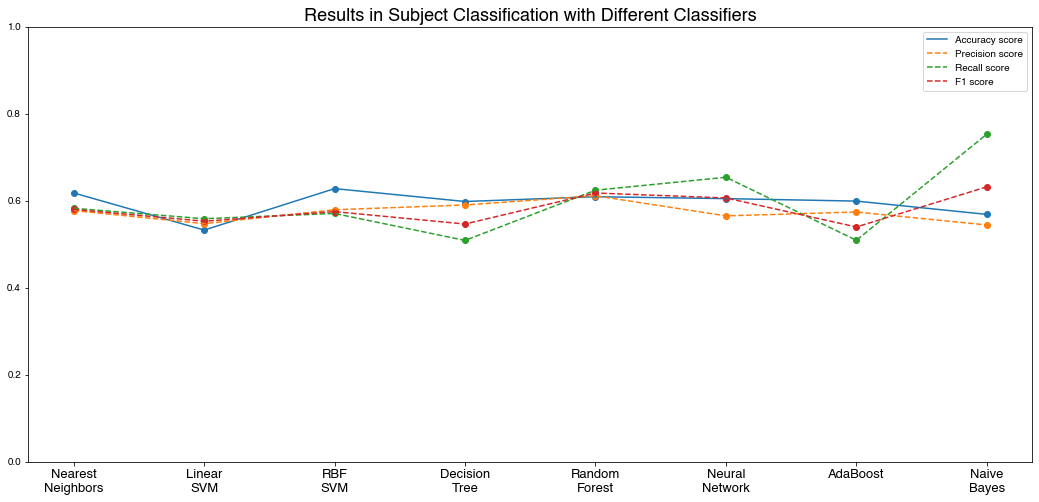

In [15]:
plt.rcParams["font.family"] = "Helvetica"

fig, ax = plt.subplots(figsize=(18,8))

ax.plot(names, accuracy, label='Accuracy score')
ax.plot(names, precision, linestyle='dashed', label='Precision score')
ax.plot(names, recall, linestyle='dashed', label='Recall score')
ax.plot(names, f1, linestyle='dashed', label='F1 score')

ax.scatter(names, accuracy)
ax.scatter(names, precision)
ax.scatter(names, recall)
ax.scatter(names, f1)
ax.legend(frameon=True)
plt.xticks(fontsize=13)

plt.ylim((0.0,1.0))


ax.set_title("Results in Subject Classification with Different Classifiers", fontsize=18);

In [16]:
dict(zip(names, f1))

{'Nearest\nNeighbors': 0.5798069784706755,
 'Linear\nSVM': 0.5527086383601757,
 'RBF\nSVM': 0.5747572815533981,
 'Decision\nTree': 0.5462485113140135,
 'Random\nForest': 0.6175386882829771,
 'Neural\nNetwork': 0.6061442871936487,
 'AdaBoost': 0.5393988627132412,
 'Naive\nBayes': 0.6317103620474406}

In [18]:
result = {"first-order": [accuracy, precision, recall, f1]}

In [20]:
import json